<a href="https://colab.research.google.com/github/kartik17jan-sketch/California-Housing-Price-Predicition/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

np.random.seed(0)

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
#60000 images of 28X28 sixe

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


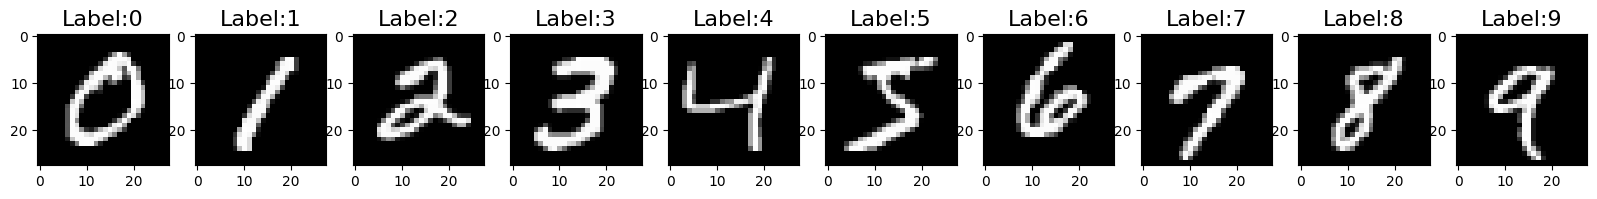

In [5]:
#Visualize Examples
num_classes = 10
f,ax = plt.subplots(1,num_classes,figsize=(20,20))

for i in range(0,num_classes):
  sample= x_train[y_train == i][0]
  ax[i].imshow(sample,cmap='grey')
  ax[i].set_title("Label:{}".format(i),fontsize=16)


In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
#Flatten first (make labels 1D integers).Flattening means turning (n,1) into (n,) → basically removing that extra dimension
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [8]:
#one hot coding
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)

In [9]:
for i in range(10):
    print(y_train[i])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
#Normalize data
x_train = x_train/ 255.0
x_test = x_test/ 255.0


In [11]:
x_train[0].shape

(28, 28)

In [12]:
#we are going to reshape the x_train and_test
x_train = x_train.reshape(x_train.shape[0],-1)
x_test= x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


In [13]:
model = Sequential()

model.add(Dense(units=128,input_shape=(784,),activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.25))  #This means 25% neurons will be activated
model.add(Dense(units=10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(x_train,y_train,batch_size=512,epochs=10)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6693 - loss: 1.0938
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9261 - loss: 0.2520
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9498 - loss: 0.1713
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9604 - loss: 0.1345
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9681 - loss: 0.1100
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9723 - loss: 0.0933
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9759 - loss: 0.0808
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9792 - loss: 0.0680
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9802 - loss: 0.0630
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9846 - loss: 0.0518


In [15]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test Loss : {}, Test Accuracy : {}".format(test_loss,test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9700 - loss: 0.0930
Test Loss : 0.08046887814998627, Test Accuracy : 0.9746999740600586


In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.3739773e-06 1.0536694e-05 4.9170641e-05 ... 9.9867702e-01
  2.2391700e-06 4.6146808e-05]
 [1.5240987e-08 3.0067235e-05 9.9984694e-01 ... 1.0930952e-08
  7.5607431e-06 1.5575402e-10]
 [3.2213463e-06 9.9878168e-01 9.4973053e-05 ... 3.9650532e-04
  4.1353324e-04 1.6314367e-05]
 ...
 [6.6693484e-10 1.5470608e-08 1.2096564e-10 ... 3.8728635e-07
  3.2694295e-06 1.2835888e-04]
 [3.9576355e-07 1.9299530e-07 9.9395792e-10 ... 1.3028762e-07
  6.6107209e-04 3.0132030e-09]
 [2.9787736e-07 3.6757868e-09 7.3115136e-09 ... 6.4551480e-12
  3.1634201e-08 3.5177377e-09]]
[7 2 1 ... 4 5 6]


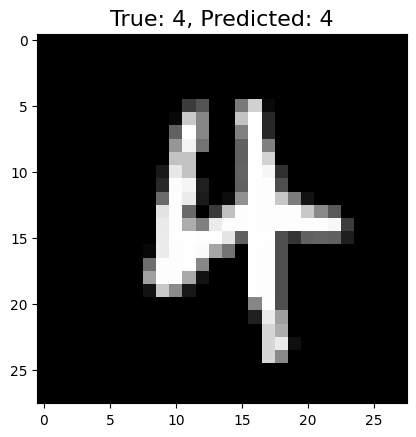

In [24]:
#Single Example
random_idx = np.random.choice(len(x_test))
y_true = np.argmax(y_test,axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_classes = y_pred_classes[random_idx]

plt.title("True: {}, Predicted: {}".format(y_sample_true,y_sample_pred_classes),fontsize=16)
plt.imshow(x_test[random_idx].reshape(28,28),cmap='gray')


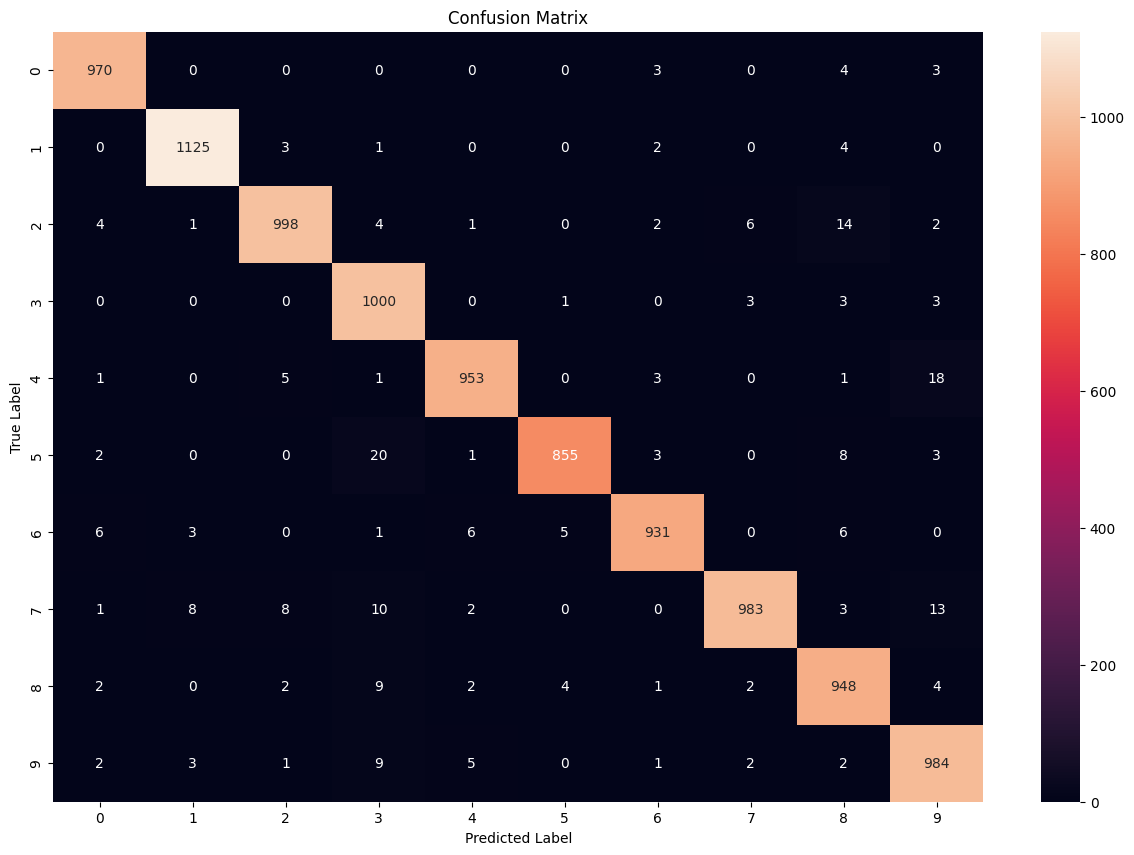

In [26]:
#confusion matrix
cm = confusion_matrix(y_true,y_pred_classes)
fig,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(cm,annot=True,fmt='d',ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');